In [24]:
import pandas as pd
import numpy as np

from datetime import datetime




%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go


In [25]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")


# Explorative Data Analysis


focus is often a visual representation of the data



In [26]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date',ascending=False).head()

,date,Australia,US,Austria,Germany
886,2022-06-26,8026309,86967639,4400566,27771911
885,2022-06-25,8000312,86949088,4400566,27771112
884,2022-06-24,7978875,86909716,4400566,27771111
883,2022-06-23,7945726,86757621,4391150,27681775
882,2022-06-22,7919844,86636306,4379778,27573585


# Matplotlib Example


<Figure size 1152x648 with 0 Axes>

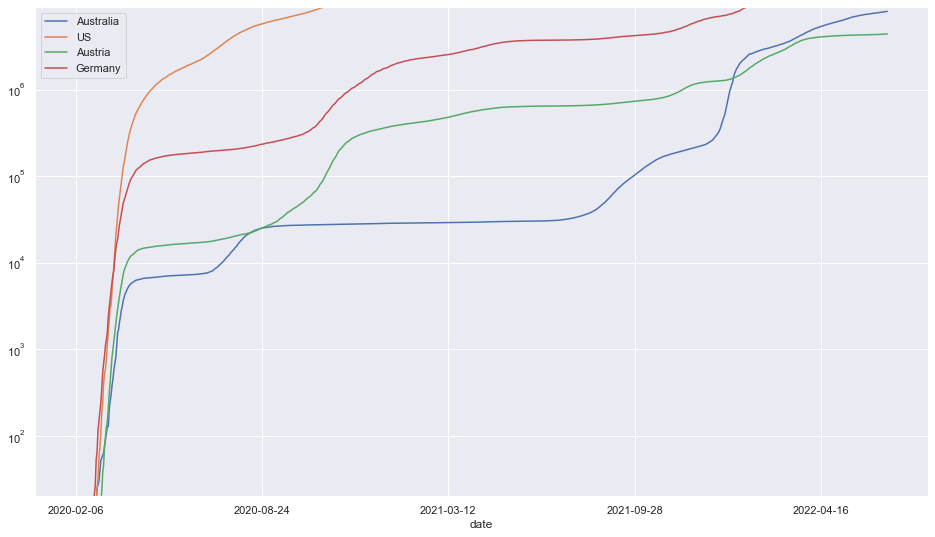

In [27]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(20, 9000000)
ax.set_yscale('log')


# Plot.ly


In [28]:
import plotly.graph_objects as go


In [29]:
import plotly
plotly.__version__


'5.9.0'

In [30]:
country_list=['Australia',
              'US',
              'Austria',
              'Germany',
             ] 


In [31]:
fig = go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])


fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome')
fig.show()

In [32]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Australia', 'value': 'Australia'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Austria', 'value': 'Austria'},
            {'label': 'Germany', 'value': 'Germany'},
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [33]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }
